### Data Exploration 

In [3]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Data/preprocessed_dataset.csv')

In [55]:
# show head
df.head()

,happiness_classification,norm_imports,norm_exports,fear,anger,surprise,sadness,disgust,joy,anticipation,year,country
0,not-happy,13.643921,11.979343,0.044010,0.029340,0.034230,0.031785,0.026895,0.056235,0.100244,2005,Mexico
1,not-happy,13.469564,15.552570,0.060606,0.028520,0.033868,0.035651,0.024955,0.057041,0.112299,2005,Japan
2,happy,6.874739,7.213294,0.072381,0.049524,0.040000,0.038095,0.034286,0.097143,0.091429,2005,Belgium
3,not-happy,6.624081,4.183923,0.059840,0.043883,0.019947,0.041223,0.031915,0.070479,0.093085,2005,Pakistan
4,happy,12.099429,11.116681,0.070225,0.043539,0.036517,0.036517,0.028090,0.081461,0.102528,2005,France


In [56]:
df.country.nunique()

131

In [57]:
# all columns
print(df.columns.values)

# Quantiles, mean, min, max etc. of the dataset
df.describe()

['happiness_classification' 'norm_imports' 'norm_exports' 'fear' 'anger'
 'surprise' 'sadness' 'disgust' 'joy' 'anticipation' 'year' 'country']


,norm_imports,norm_exports,fear,anger,surprise,sadness,disgust,joy,anticipation,year
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,6.456758,5.973886,0.075533,0.051372,0.029842,0.044563,0.027387,0.076754,0.096618,2010.248643
std,21.974137,23.279404,0.019541,0.017523,0.008499,0.015038,0.010827,0.014812,0.014985,2.612691
min,0.027052,0.009347,0.021505,0.005025,0.004808,0.000000,0.000000,0.015038,0.045113,2005.000000
25%,0.912420,0.489041,0.062077,0.039352,0.024217,0.033898,0.019980,0.067293,0.086667,2008.000000
50%,1.978003,1.436391,0.074246,0.049784,0.029661,0.043554,0.026506,0.076726,0.096386,2011.000000
75%,4.269860,3.763795,0.087719,0.061644,0.035262,0.054902,0.034137,0.085995,0.106713,2012.000000
max,230.704658,241.990881,0.165254,0.126783,0.063679,0.100962,0.061275,0.143275,0.146186,2014.000000


In [58]:
# Describe null values in dataset and where they are
print(df.isnull().sum())
print("")

# Percentage of null values from total column
# Grey source reference: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
print((df.isnull().sum()/len(df))*100) 

happiness_classification    0
norm_imports                0
norm_exports                0
fear                        0
anger                       0
surprise                    0
sadness                     0
disgust                     0
joy                         0
anticipation                0
year                        0
country                     0
dtype: int64

happiness_classification    0.0
norm_imports                0.0
norm_exports                0.0
fear                        0.0
anger                       0.0
surprise                    0.0
sadness                     0.0
disgust                     0.0
joy                         0.0
anticipation                0.0
year                        0.0
country                     0.0
dtype: float64


In [10]:
# Number of unique values
print(df.nunique())

happiness_classification      2
norm_imports                921
norm_exports                921
fear                        869
anger                       875
surprise                    805
sadness                     843
disgust                     837
joy                         847
anticipation                846
year                         10
country                     131
dtype: int64


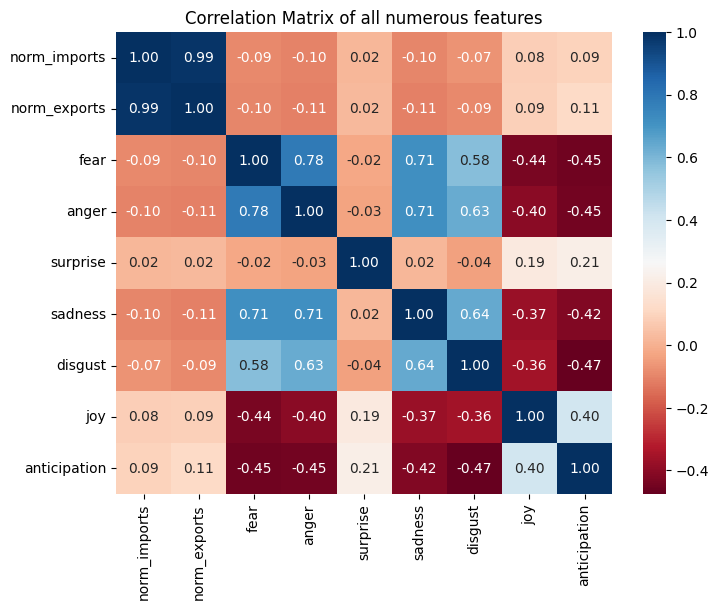

In [11]:
corr_df = df.drop(['happiness_classification', 'year', 'country'], axis=1)
correlation_matrix= corr_df.corr(method='pearson')

# Create a heatmap with conditional formatting
plt.figure(figsize=(8, 6)) 
plt.title("Correlation Matrix of all numerous features")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')

plt.savefig('Figures/corr-matrix.png')

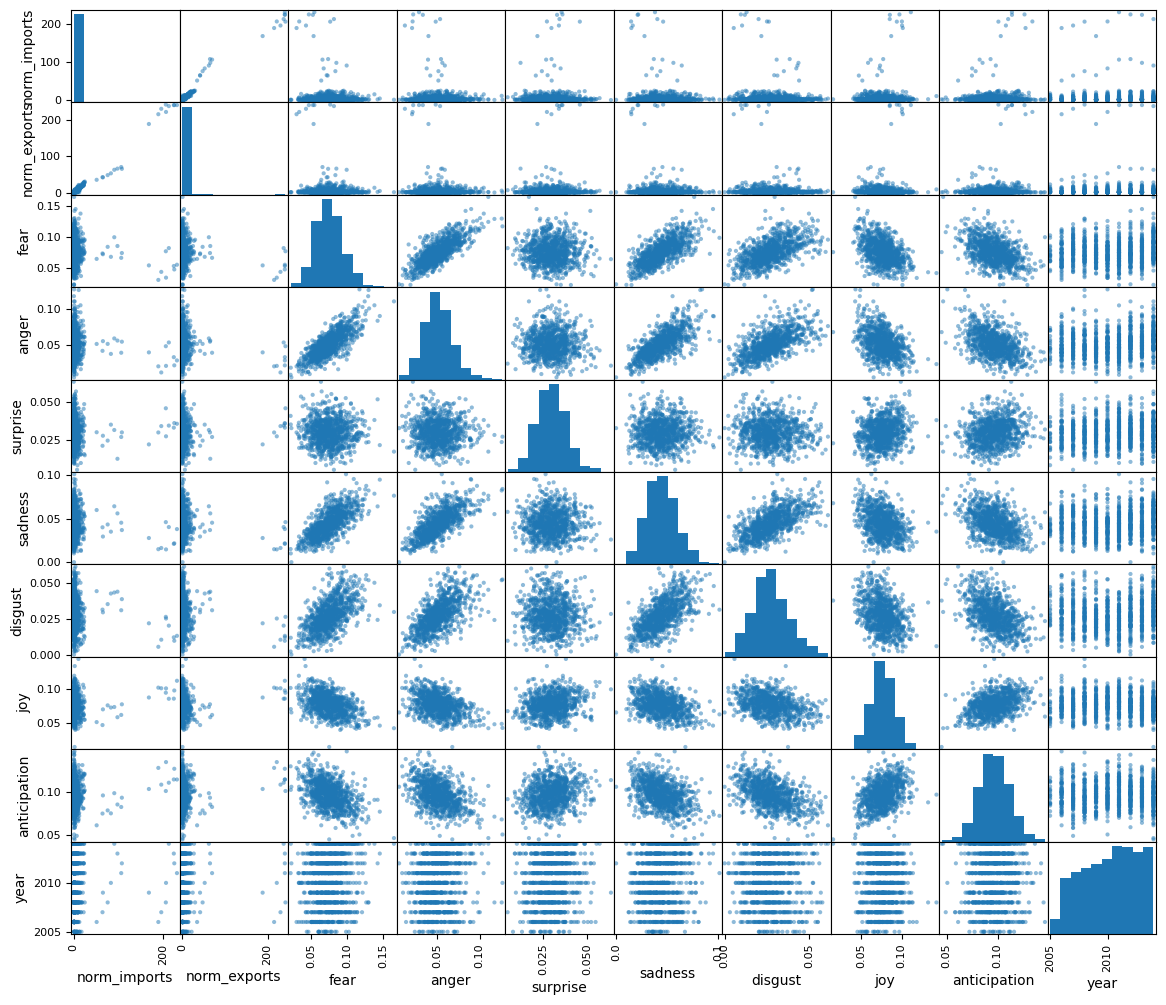

In [12]:
figure = pd.plotting.scatter_matrix(df, figsize=(14,12))
plt.savefig('Figures/scatter.png')

In [43]:
# Question 1 
df.head()

,happiness_classification,norm_imports,norm_exports,fear,anger,surprise,sadness,disgust,joy,anticipation,year,country
0,not-happy,13.643921,11.979343,0.044010,0.029340,0.034230,0.031785,0.026895,0.056235,0.100244,2005,Mexico
1,not-happy,13.469564,15.552570,0.060606,0.028520,0.033868,0.035651,0.024955,0.057041,0.112299,2005,Japan
2,happy,6.874739,7.213294,0.072381,0.049524,0.040000,0.038095,0.034286,0.097143,0.091429,2005,Belgium
3,not-happy,6.624081,4.183923,0.059840,0.043883,0.019947,0.041223,0.031915,0.070479,0.093085,2005,Pakistan
4,happy,12.099429,11.116681,0.070225,0.043539,0.036517,0.036517,0.028090,0.081461,0.102528,2005,France


In [61]:
region_emotions = df.groupby('country').mean(numeric_only=True).reset_index()
region_emotions['most_common_emotion'] = region_emotions[['fear', 'anger', 'surprise', 'sadness', 'disgust', 'joy', 'anticipation']].idxmax(axis=1)
region_emotions

,country,norm_imports,norm_exports,fear,anger,surprise,sadness,disgust,joy,anticipation,year,most_common_emotion
0,Afghanistan,4.113027,0.263093,0.092566,0.067610,0.030339,0.057407,0.040147,0.073148,0.085904,2011.000000,fear
1,Albania,0.443528,0.159575,0.061359,0.044791,0.028784,0.031626,0.026946,0.084870,0.104879,2010.857143,anticipation
2,Algeria,4.400979,5.695429,0.072397,0.058644,0.023920,0.042386,0.028827,0.069679,0.092150,2011.750000,anticipation
3,Angola,2.751847,7.748339,0.064799,0.044120,0.029471,0.036199,0.019952,0.081558,0.106797,2012.500000,anticipation
4,Argentina,2.449931,2.872979,0.079500,0.061051,0.027144,0.061279,0.035565,0.059435,0.088715,2010.000000,anticipation
...,...,...,...,...,...,...,...,...,...,...,...,...
126,Uruguay,0.584295,0.407346,0.078755,0.057708,0.027257,0.052146,0.034970,0.078224,0.081642,2010.000000,anticipation
127,Uzbekistan,2.074654,1.156437,0.075747,0.039929,0.034426,0.048145,0.027373,0.066188,0.086082,2010.428571,anticipation
128,Yemen,3.300972,2.188259,0.089935,0.063675,0.031340,0.049189,0.032479,0.079545,0.088207,2010.857143,fear
129,Zambia,2.019613,2.162240,0.083796,0.046444,0.026585,0.051521,0.031438,0.072067,0.098891,2010.000000,anticipation


In [62]:
emotion_counts = region_emotions['most_common_emotion'].value_counts().reset_index()
emotion_counts.columns = ['most_common_emotion', 'count']
fig = px.bar(emotion_counts, x='most_common_emotion', y='count', 
             text='count', title='Number of Countries per Most Common Emotion')
fig.show()

In [49]:
countries_per_emotion = {}
unique_emotions = region_emotions['most_common_emotion'].unique()
for emotion in unique_emotions:
    countries_with_emotion = region_emotions[region_emotions['most_common_emotion'] == emotion]['country'].tolist()
    countries_per_emotion[emotion] = countries_with_emotion

print(countries_per_emotion)

{'fear': ['Afghanistan', 'Armenia', 'Cambodia', 'Central African Republic', 'Colombia', 'Djibouti', 'Georgia', 'Guyana', 'Israel', 'Libya', 'Mauritius', 'Nicaragua', 'Singapore', 'Somalia', 'Sri Lanka', 'Yemen'], 'anticipation': ['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malt

In [5]:
year_emotions = df.groupby('year').mean(numeric_only=True).reset_index()
year_emotions

,year,norm_imports,norm_exports,fear,anger,surprise,sadness,disgust,joy,anticipation
0,2005,6.206581,6.080926,0.070961,0.048304,0.025699,0.040629,0.030826,0.065793,0.095659
1,2006,5.170836,5.249932,0.070218,0.049541,0.029520,0.045088,0.029072,0.078028,0.097641
2,2007,6.553490,6.473692,0.079241,0.050537,0.028427,0.044261,0.027625,0.073298,0.094425
3,2008,7.305995,6.940114,0.076476,0.050889,0.027926,0.043576,0.027380,0.081399,0.093092
4,2009,5.463658,5.135342,0.074146,0.046070,0.029647,0.040706,0.025455,0.076783,0.095156
5,2010,6.556491,5.987343,0.070693,0.048143,0.030150,0.040521,0.025435,0.078719,0.099378
6,2011,6.559055,5.887173,0.071052,0.047037,0.031033,0.041850,0.023194,0.080220,0.099775
7,2012,6.740839,6.094983,0.075634,0.054653,0.030604,0.046511,0.027362,0.077260,0.097454
8,2013,6.934413,6.214658,0.075846,0.052939,0.030052,0.046651,0.028603,0.074458,0.098143
9,2014,6.495198,5.741587,0.085760,0.060695,0.030941,0.051247,0.031885,0.073227,0.093703


In [7]:
fig = px.line(year_emotions, x='year', y=['fear','joy', 'anticipation'],
              title='Emotion Trends Over Time')
fig.show()